In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('car_price_dataset.csv')

In [3]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [4]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 2.9 MB


In [5]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [6]:
df.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

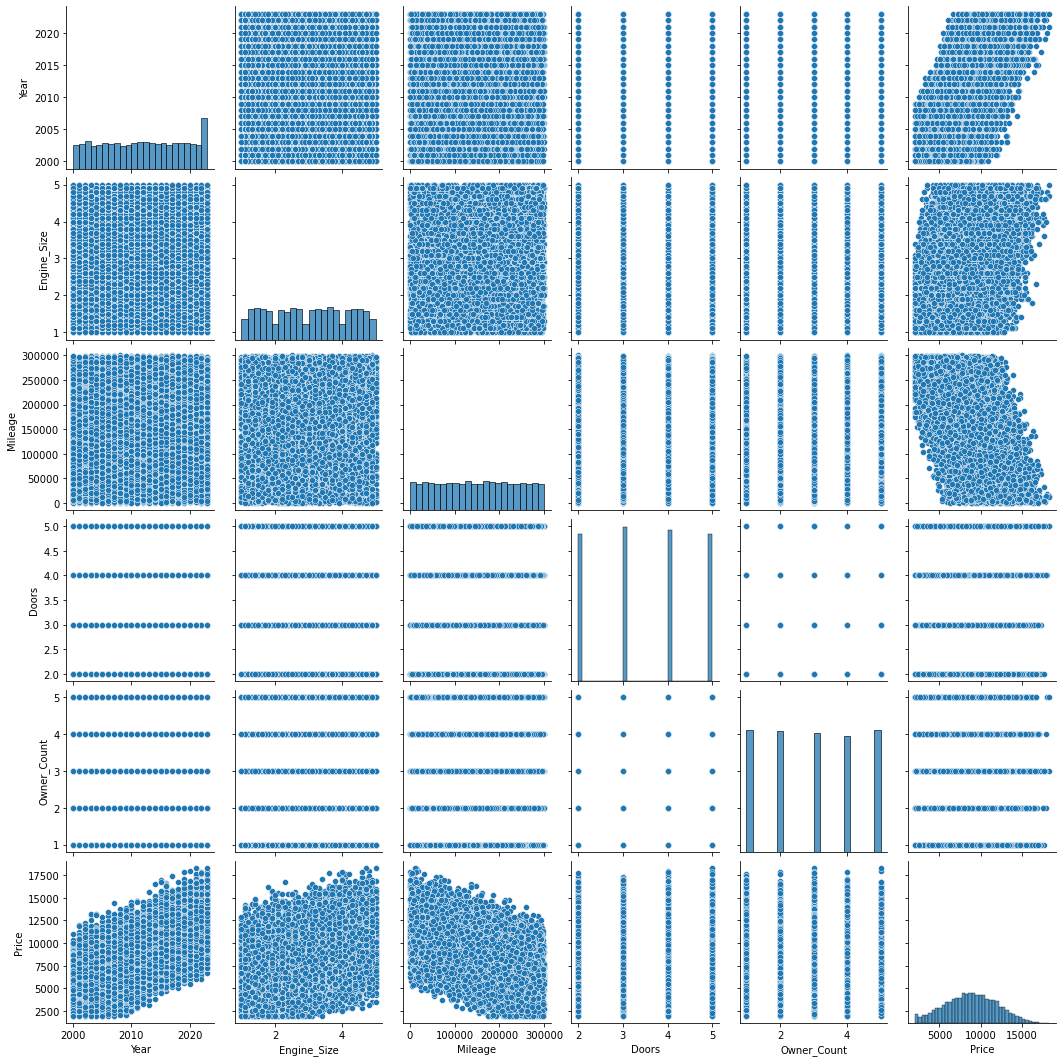

In [7]:
sns.pairplot(df)

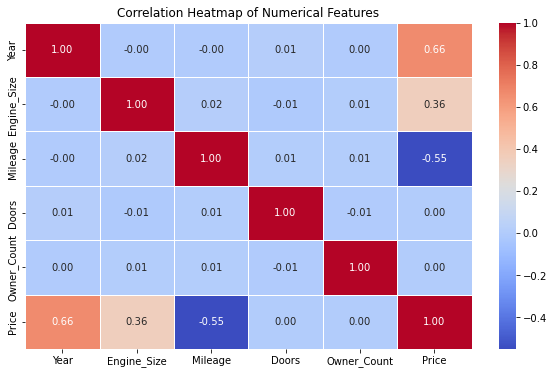

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

The Heatmap shows correlation of Engine_Size, Milage, Year with Price. 

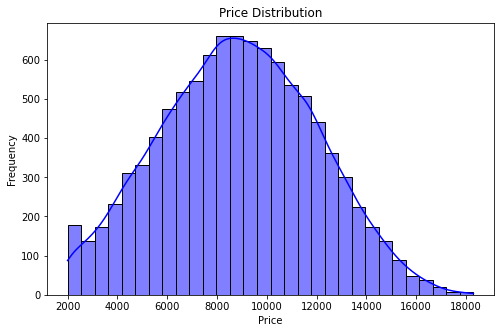

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=30, kde=True, color="blue")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

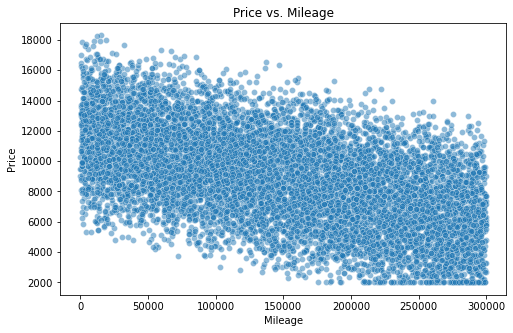

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Mileage"], y=df["Price"], alpha=0.5)
plt.title("Price vs. Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

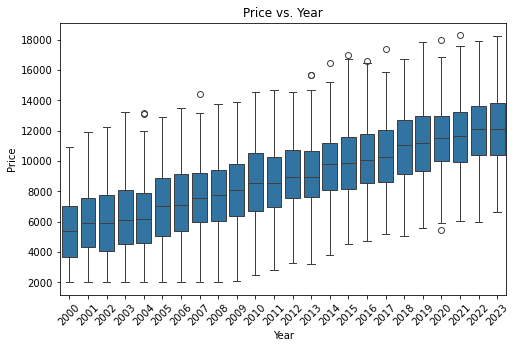

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Year"], y=df["Price"])
plt.xticks(rotation=45)
plt.title("Price vs. Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

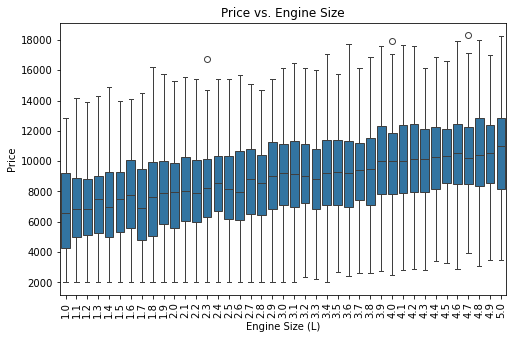

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Engine_Size"], y=df["Price"])
plt.xticks(rotation=90)
plt.title("Price vs. Engine Size")
plt.xlabel("Engine Size (L)")
plt.ylabel("Price")
plt.show()

# Prediction 

I will use Random Forest Regressor model for prediction and also cross validate. 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [14]:
# Define features and target variable
X = df.drop(columns=["Price"])  # Features
y = df["Price"]  # Target variable

In [15]:
# Identify categorical and numerical features
categorical_features = ["Brand", "Model", "Fuel_Type", "Transmission"]
numerical_features = ["Year", "Engine_Size", "Mileage", "Doors", "Owner_Count"]

In [16]:
#Preprocessing: OneHotEncode categorical variables & scale numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

In [17]:
# Define model pipeline with Random Forest
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

In [18]:
#Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Engine_Size',
                                                   'Mileage', 'Doors',
                                                   'Owner_Count']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Brand', 'Model',
                                                   'Fuel_Type',
                                                   'Transmission'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [20]:
# Make predictions
y_pred = model.predict(X_test)

In [21]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [22]:
rmse, r2

(334.9177557002614, 0.987791445348444)

## Conclusion:

The car price prediction model was successfully developed using a Random Forest Regressor. The model performed well, achieving an R² score of 0.9878, which indicates that it explains approximately 98.78% of the variance in car prices. The RMSE of 334.92 suggests that the model makes relatively accurate predictions. Future improvements could include experimenting with different feature engineering techniques, tuning hyperparameters, or using ensemble models to enhance accuracy further.